# Plotting Tools

In [1]:
import os
import csv

import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

### Basic plotting example

In [147]:
def plot(filename, env='dm'):
    returns = []
    dist = []
    data = loadmat(filename)
    target_start = 0
    target_end = 0
    
    min_num_trials = data["returns"].shape[1]

    print(data["returns"].shape)
    print(data["observations"].shape)
    print(data["actions"].shape)
    print(data["rewards"].shape)
    if env == 'dm':
        target_start = 9
        target_end = 12
    elif env == 'gym':
        target_start = 7
        target_end = 10
        
    obs = np.array(data["observations"])

    if data["returns"].shape[1] >= min_num_trials:
        returns.append(data["returns"][0][:min_num_trials])
        dist.append(obs[:min_num_trials,149,target_start:target_end])

    dist = np.array(dist)
    dist = np.linalg.norm(dist, axis=2)
#     dist = np.minimum.accumulate(dist, axis=-1)

    returns = np.array(returns)
    returns = np.maximum.accumulate(returns, axis=-1)
    mean = np.mean(returns, axis=0)


    # Plot result
    plt.figure()
    plt.plot(np.arange(1, min_num_trials + 1), dist[0])
    plt.title("distance")
    plt.xlabel("Iteration number")
    plt.ylabel("Distance")

    plt.figure()
    plt.plot(np.arange(1, min_num_trials + 1), mean)
    plt.title("Performance")
    plt.xlabel("Iteration number")
    plt.ylabel("Return")
    plt.show()

(1, 100)
(105, 151, 21)
(105, 150, 9)
(105, 150)


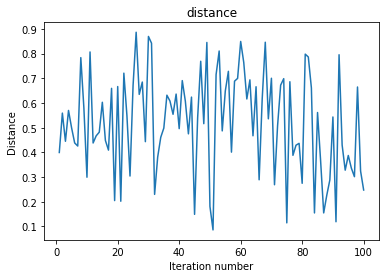

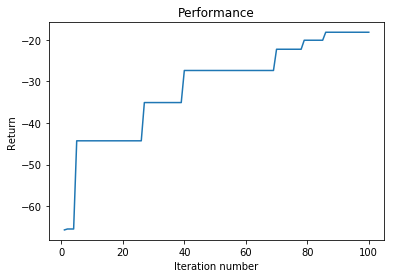

In [148]:
# without action cost
# commit 1a4de0f
# position actuator
plot('./logs-pos.mat')

(1, 100)
(105, 151, 21)
(105, 150, 9)
(105, 150)


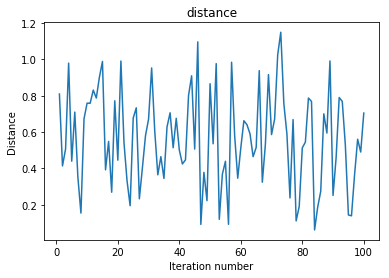

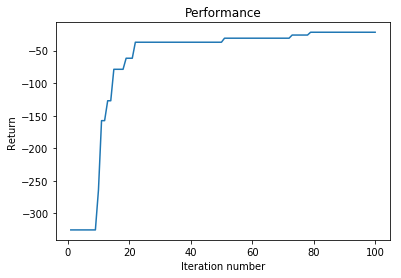

In [137]:
# without inertial, small damping
plot('./logs-no-inertial-100.mat')

(1, 100)
(105, 151, 21)
(105, 150, 9)
(105, 150)


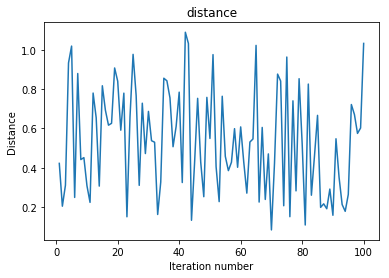

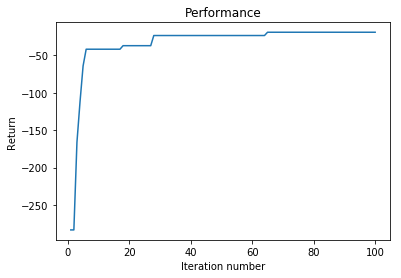

In [138]:
# with inertial, damping
plot('./logs-motor.mat')

(1, 100)
(101, 151, 17)
(101, 150, 7)
(101, 150)


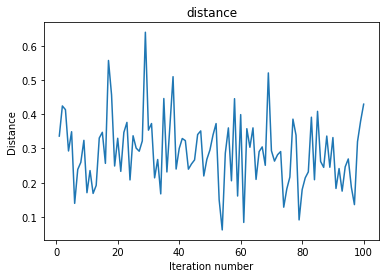

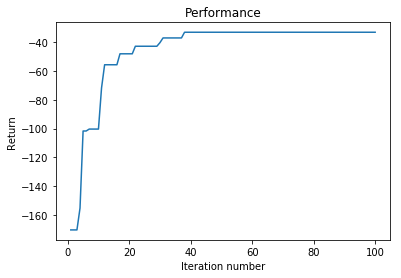

In [146]:
# tf version reacher
plot('./logs-tf-reacher.mat', 'gym')

In [75]:
def plot_dynamics(filename, train='mujoco.mat', test='jaco.mat'):
    data_m = loadmat(filename + train)
    data_j = loadmat(filename + test)
    print(data_m["returns"].shape)
    print(data_m["observations"].shape)
    print(data_m["actions"].shape)
    print(data_m["rewards"].shape)
    steps = data_m['rewards'].shape[1]+1
    print(steps)
    rewards_diff = data_m['rewards'] - data_j['rewards']
    obs_diff = data_m['observations'] - data_j['observations']
    actions_diff = data_m['actions'] - data_j['actions']
    
    dist_m = np.linalg.norm(data_m["observations"][:,9:12], axis=1)
    dist_j = np.linalg.norm(data_j["observations"][:,9:12], axis=1)
    
    # Plot result
    plt.figure()
    plt.plot(np.arange(1, steps+1), dist_m)
    plt.title("dist mujoco")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps+1), dist_j)
    plt.title("dist jaco")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps+1), dist_m - dist_j)
    plt.title("dist diff")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), rewards_diff[0])
    plt.title("reward diff")
    plt.xlabel("step number")
    plt.ylabel("")

    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,0])
    plt.title("action diff joint 1")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,1])
    plt.title("action diff joint 2")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps+1), obs_diff[:,1])
    plt.title("obs diff joint 2")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,2])
    plt.title("action diff joint 3")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps+1), obs_diff[:,2])
    plt.title("obs diff joint 3")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,3])
    plt.title("action diff joint 4")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,4])
    plt.title("action diff joint 5")
    plt.xlabel("step number")
    plt.ylabel("")
    
    plt.figure()
    plt.plot(np.arange(1, steps), actions_diff[:,5])
    plt.title("action diff joint 6")
    plt.xlabel("step number")
    plt.ylabel("")
    plt.show()

(1, 1)
(51, 15)
(50, 9)
(1, 50)
51


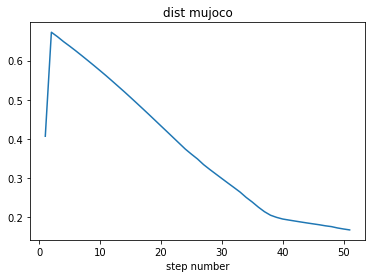

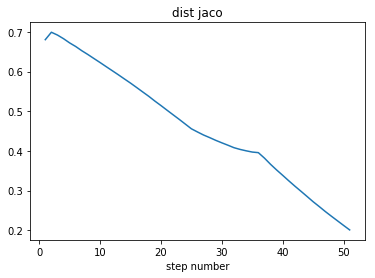

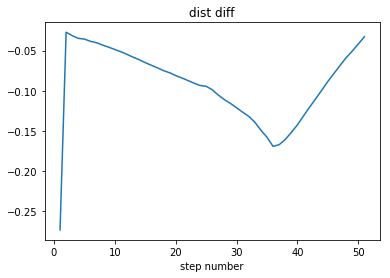

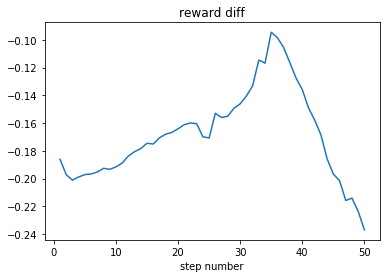

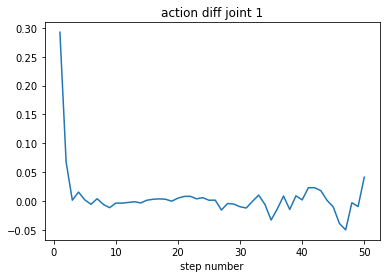

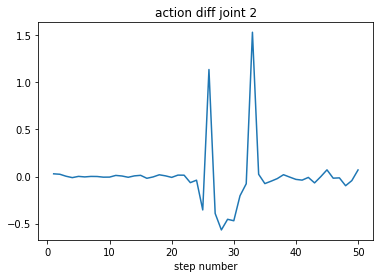

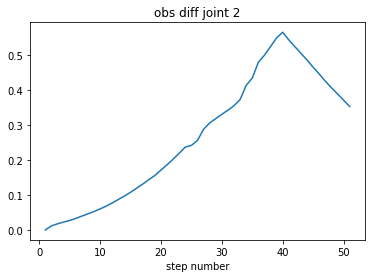

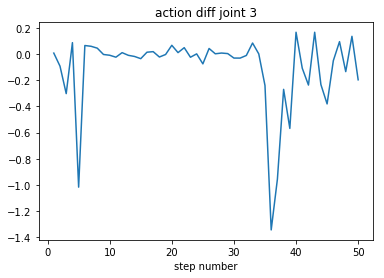

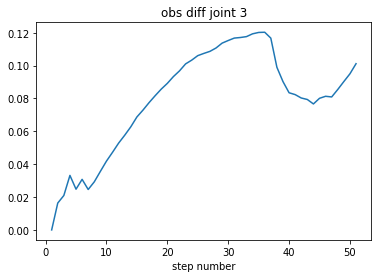

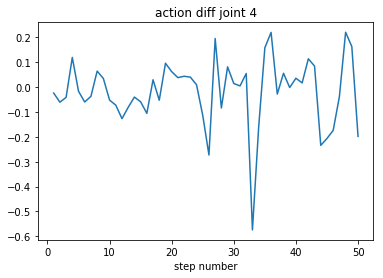

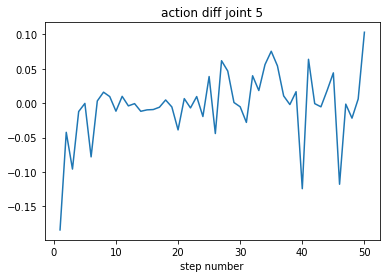

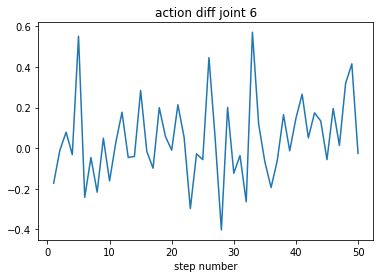

In [76]:
plot_dynamics('output/1557262695.6322207')

(1, 1)
(81, 15)
(80, 9)
(1, 80)
81


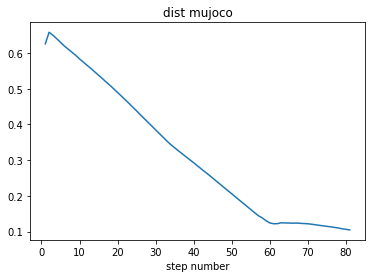

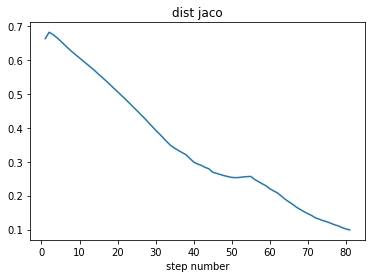

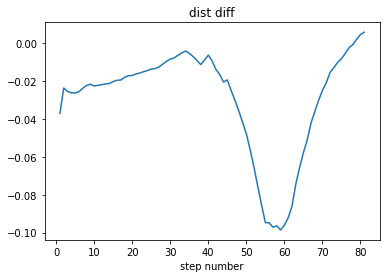

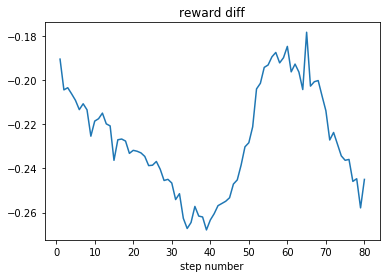

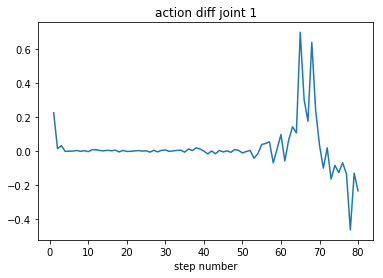

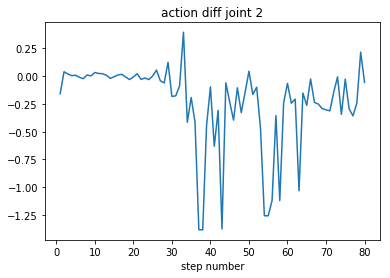

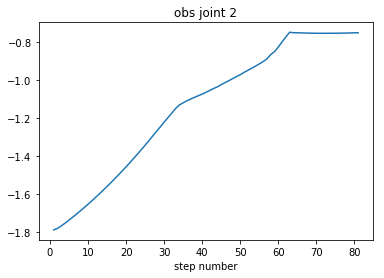

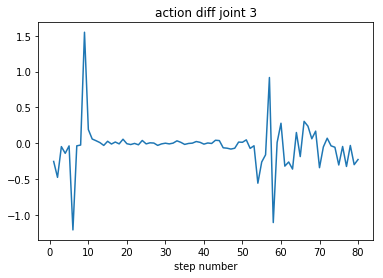

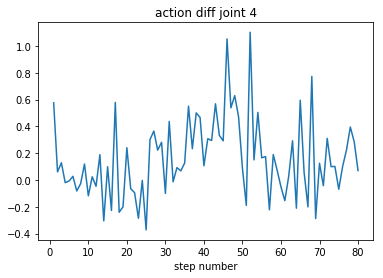

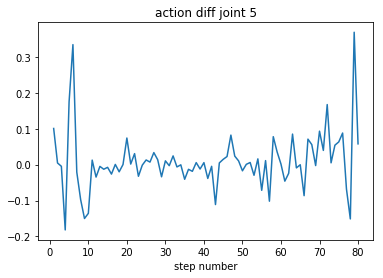

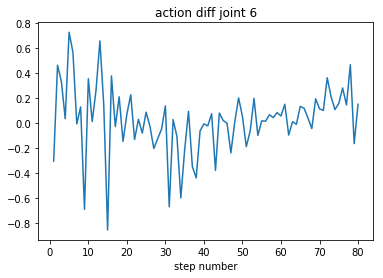

In [69]:
# model with damping noise training, 80 test steps
plot_dynamics('output/1557431660.6081545')

(1, 1)
(81, 15)
(80, 9)
(1, 80)
81


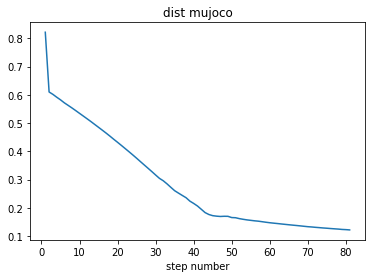

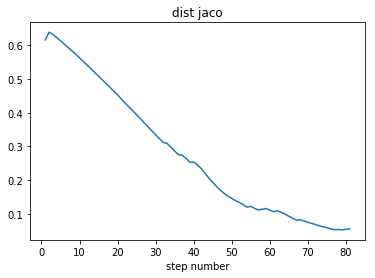

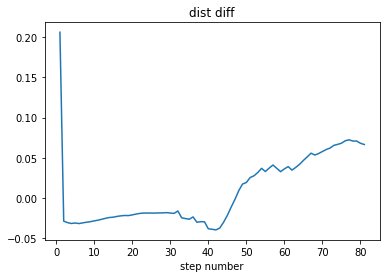

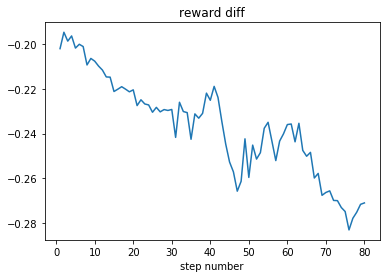

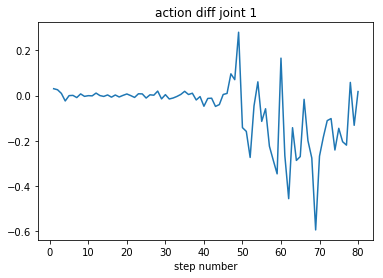

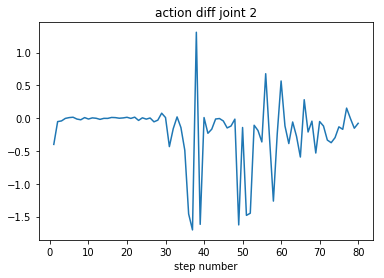

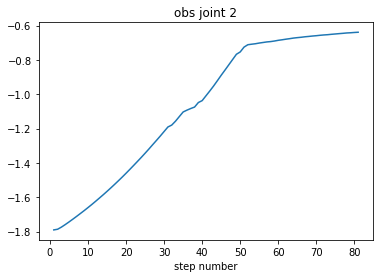

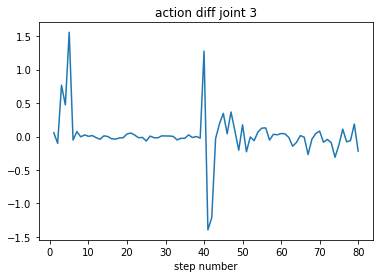

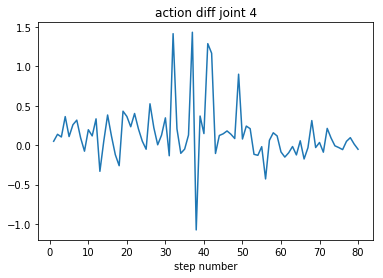

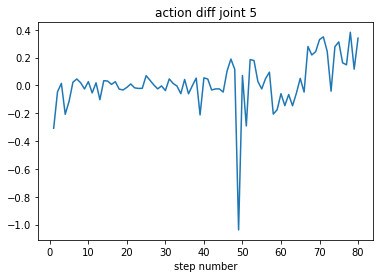

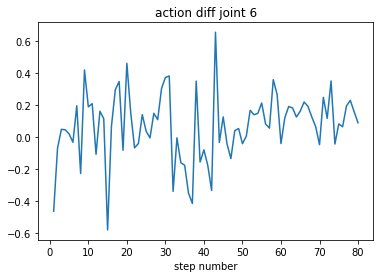

In [70]:
plot_dynamics('output/1557431217.6681316')

(1, 1)
(81, 15)
(80, 9)
(1, 80)
81


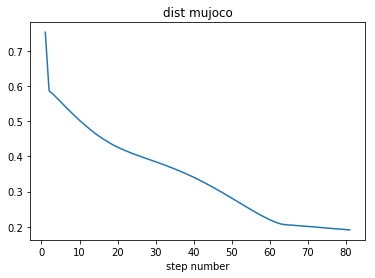

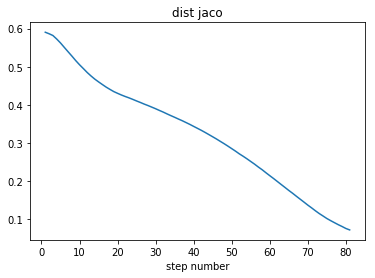

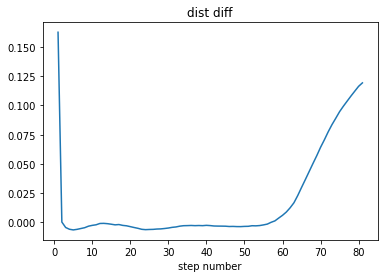

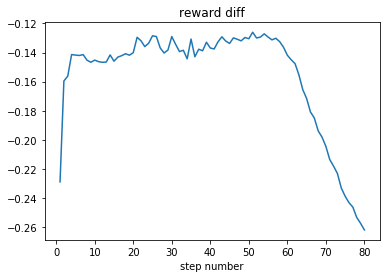

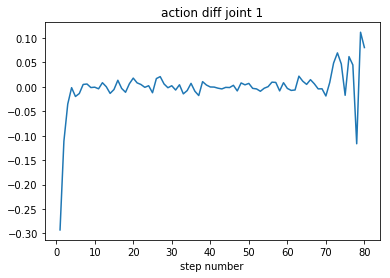

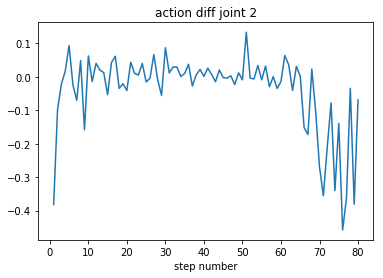

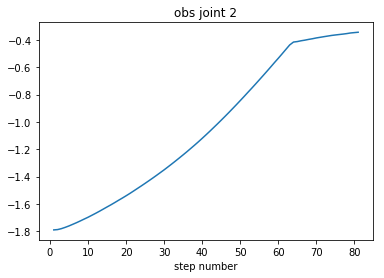

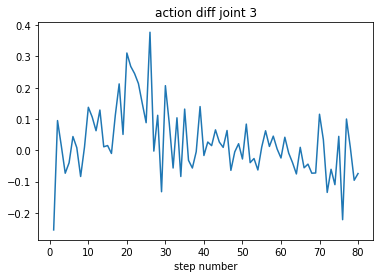

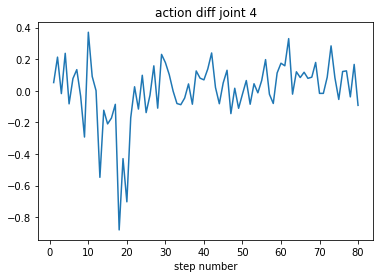

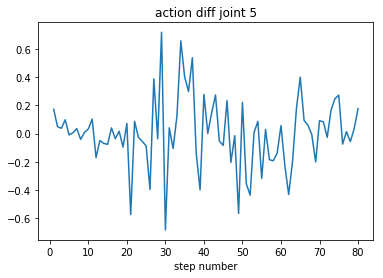

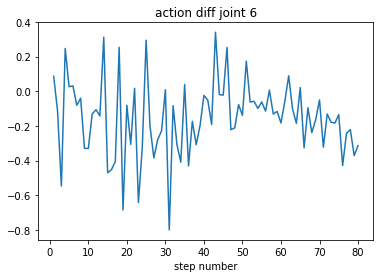

In [71]:
plot_dynamics('output/1557430822.7009466')

(1, 1)
(71, 15)
(70, 9)
(1, 70)
71


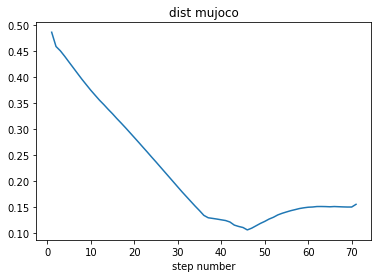

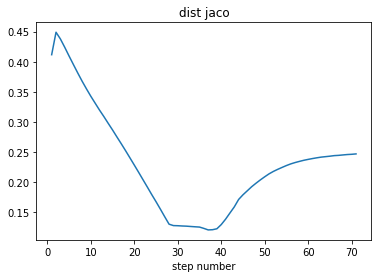

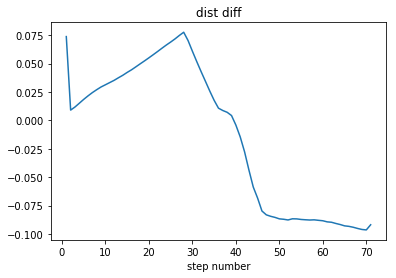

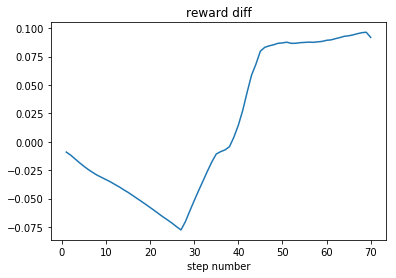

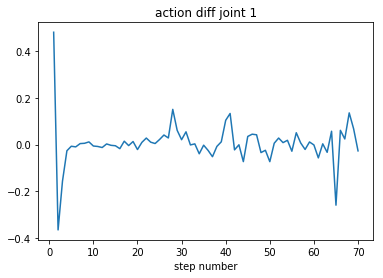

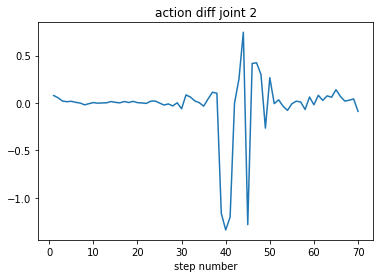

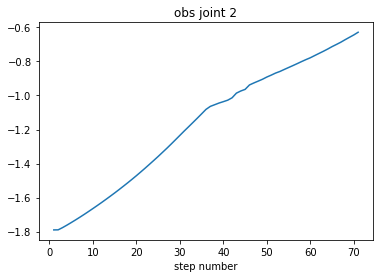

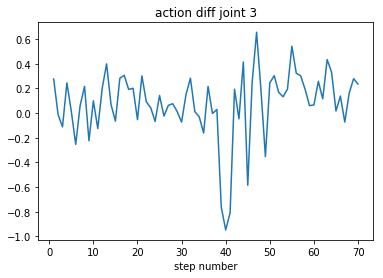

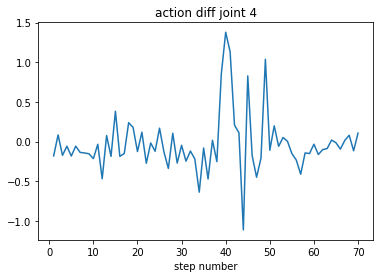

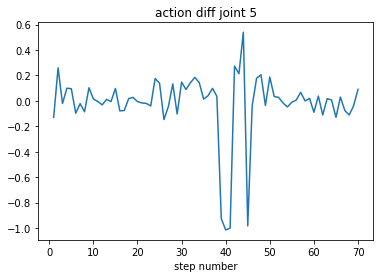

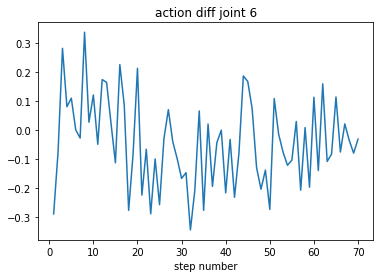

In [72]:
# both mujoco different damping
plot_dynamics('output/1557419980.1690712', train="_basic", test="_test")